# Clothing Material and Heat Transfer

Kristtiya Guerra and Audrey Lee

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### The Human Body



I will set a `State` object for the initial temperature of the human body (in Kelvin).

In [2]:
meter = UNITS.meter
watt = UNITS.watt
minute = UNITS.minute
kelvin = UNITS.kelvin
celsius = UNITS.celsius

HumanTemp = 37 + 273.15 
WinterInit = State(HumanTemp=HumanTemp, dQdt = 0,  
                   top =0.41/1.136, bottom=0.21/1.136, socks=0.04/1.136, rHuman=.003874,
                   Atop=1.6*.47, Abottom=1.6*.45, Asocks=1.6*.07)

SummerInit = State(HumanTemp=HumanTemp, dQdt = 0, 
                   top =0.07/1.136, bottom=0.09/1.136, socks=0.03/1.136, rHuman=.003874,
                   Atop=1.6*.12, Abottom=1.6*.18, Asocks=1.6*.05)

LoungeInit = State(HumanTemp=HumanTemp, dQdt = 0, 
                   top =0.38/1.136, bottom=0.34/1.136, socks=0.03/1.136, rHuman=.003874,
                   Atop=1.6*.45, Abottom=1.6*.44, Asocks=1.6*.07)

DressInit = State(HumanTemp=HumanTemp, dQdt = 0, 
                   top =0.83/1.136, bottom=0.59/1.136, socks=0.02/1.136, rHuman=.003874,
                   Atop=1.6*.40, Abottom=1.6*.19, Asocks=1.6*.35)

Nothing = State(HumanTemp=HumanTemp, dQdt = 0, 
                   top =0.0000001/1.136, bottom=0.0000001/1.136, socks=0.0000001/1.136, rHuman=.003874,
                   Atop=1.6, Abottom=1.6, Asocks=1.6)

,values
HumanTemp,3.101500e+02
dQdt,0.000000e+00
top,8.802817e-08
bottom,8.802817e-08
socks,8.802817e-08
rHuman,3.874000e-03
Atop,1.600000e+00
Abottom,1.600000e+00
Asocks,1.600000e+00


And a `System` object to contain the system parameters.

In [3]:
human = System(WinterInit=WinterInit, 
               SummerInit=SummerInit,
               LoungeInit=LoungeInit,
               DressInit=DressInit,
               Nothing=Nothing,
               T_env= 5+273.15,
               t_end=0.02,
               dt=0.0007)

,values
WinterInit,HumanTemp 310.150000 dQdt 0.00000...
SummerInit,HumanTemp 310.150000 dQdt 0.00000...
LoungeInit,HumanTemp 310.150000 dQdt 0.00000...
DressInit,HumanTemp 310.150000 dQdt 0.00000...
Nothing,HumanTemp 3.101500e+02 dQdt 0.00000...
T_env,278.15
t_end,0.02
dt,0.0007


In [4]:
def Clothes(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    
    HumanTemp, dQdt, top, bottom, socks, rHuman, Atop, Abottom, Asocks = state
    #mass1, mass2, mass3, specHeat1, specHeat2, specHeat3, 
    T_delta = HumanTemp-T_env
    Q = (Atop * (T_delta)/top) + (Abottom * (T_delta)/bottom) + (Asocks * (T_delta)/socks) + ((1.6-(Atop+Abottom+Asocks)) * T_delta/rHuman)
    dQdt += Q *dt
    #dTdt = dQdt / ((mass1+mass2+mass3) * (specHeat1+specHeat2+specHeat3))
    #HumanTemp -= (dTdt) * dt
    
    return State(HumanTemp=HumanTemp, dQdt=dQdt, 
                 top=top, bottom=bottom, socks=socks, rHuman=rHuman, Atop=Atop, Abottom=Abottom, Asocks=Asocks)
#mass1=mass1, mass2=mass2, mass3=mass3,specHeat1=specHeat1, specHeat2=specHeat2, specHeat3=specHeat3, 

In [5]:
def run_simulation(system, Clothes):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=WinterInit.index)
    frame2 = TimeFrame(columns=SummerInit.index)
    frame3=TimeFrame(columns=LoungeInit.index)
    frame4=TimeFrame(columns=DressInit.index)
    frame5=TimeFrame(columns=Nothing.index)
    
    frame.row[0] = WinterInit
    frame2.row[0] = SummerInit
    frame3.row[0] = LoungeInit
    frame4.row[0] = DressInit
    #frame5.row[0] = Nothing
    
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = Clothes(frame.row[t], t, system)
        frame2.row[t+dt] = Clothes(frame2.row[t],t,system)
        frame3.row[t+dt] = Clothes(frame3.row[t],t,system)
        frame4.row[t+dt] = Clothes(frame4.row[t],t,system)
        #frame5.row[t+dt] = Clothes(frame5.row[t],t,system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.dQdt)
    system.T_final2 = get_last_value(frame2.dQdt)
    system.T_final3 = get_last_value(frame3.dQdt)
    system.T_final4 = get_last_value(frame4.dQdt)
    #system.T_final5 = get_last_value(frame5.dQdt)
    
    return frame, frame2, frame3, frame4 #, frame5

In [6]:
results = run_simulation(human, Clothes)

(        HumanTemp      dQdt       top    bottom     socks    rHuman   Atop  \
 0.0000     310.15  0.000000  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0007     310.15  0.297681  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0014     310.15  0.595363  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0021     310.15  0.893044  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0028     310.15  1.190725  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0035     310.15  1.488407  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0042     310.15  1.786088  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0049     310.15  2.083769  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0056     310.15  2.381451  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0063     310.15  2.679132  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0070     310.15  2.976813  0.360915  0.184859  0.035211  0.003874  0.752   
 0.0077     310.15  3.274495  0.360915  0.184859  0.

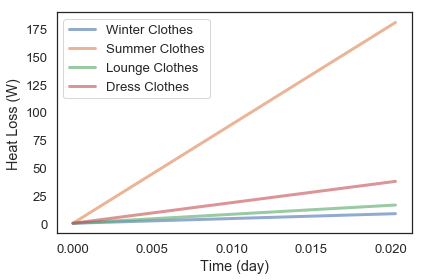

In [7]:
plot(results[0].dQdt, label='Winter Clothes')
plot(results[1].dQdt, label='Summer Clothes')
plot(results[2].dQdt, label='Lounge Clothes')
plot(results[3].dQdt, label='Dress Clothes')
#plot(results[4].dQdt, label='Nothing')

decorate(xlabel='Time (day)',
         ylabel='Heat Loss (W)')

In [8]:
human.T_final * watt

<Quantity(8.632758821592356, 'watt')>

In [9]:
human.T_final2

180.74262195829974

In [10]:
human.T_final3

16.412837976716492

In [11]:
human.T_final4

37.70919500618404

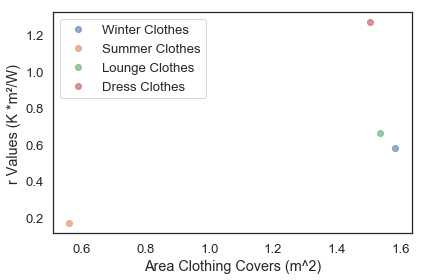

In [14]:
rValueResult = []
AreaResult = []
for tClothing in range(0,4):    
    rValueResult += [results[tClothing].top[0] + results[tClothing].bottom[0] + results[tClothing].socks[0]]
    AreaResult += [results[tClothing].Atop[0] + results[tClothing].Abottom[0] + results[tClothing].Asocks[0]]
plot(AreaResult[0], rValueResult[0], 'o', label='Winter Clothes')
plot(AreaResult[1], rValueResult[1], 'o', label='Summer Clothes')
plot(AreaResult[2], rValueResult[2], 'o', label='Lounge Clothes')
plot(AreaResult[3], rValueResult[3], 'o', label='Dress Clothes')
decorate(xlabel='Area Clothing Covers (m^2)',
        ylabel='r Values (K *m²/W)')